In [1]:
# Modèle théorique d'estimation des émissions sur le périphérique parisien
# Inspiré de la décomposition de Bigo (2020)

import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# --- Paramètres ajustables (par scénario) ---
params = {
    "distance_moyenne_km": 35,              # km/véhicule/jour
    "nombre_vehicules": 100000,             # véhicules/jour
    "conso_l_100km": 7.0,                    # L/100km @70 km/h
    "conso_l_100km_reduite": 6.5,            # L/100km @50 km/h
    "emission_CO2_par_litre": 2.3,           # kgCO2/L (essence)
    "taux_remplissage_actuel": 1.2,
    "taux_remplissage_covoit": 1.8
}

In [3]:
def calcul_emissions(params, vitesse_reduite=False, covoiturage=False):
    """
    Calcule les émissions totales de CO2 (en tonnes/jour)
    """
    d = params["distance_moyenne_km"]
    n = params["nombre_vehicules"]
    r = params["taux_remplissage_actuel"] if not covoiturage else params["taux_remplissage_covoit"]
    c = params["conso_l_100km"] if not vitesse_reduite else params["conso_l_100km_reduite"]
    e = params["emission_CO2_par_litre"]

    # Ajustement de la demande en fonction du taux de remplissage
    demande_equivalente = n * d / r  # (voy.km ou pass.km)

    # Conso énergétique totale (en litres)
    conso_totale_L = demande_equivalente * (c / 100)

    # Émissions totales de CO2 (en tonnes)
    CO2_total = conso_totale_L * e / 1000  # conversion kg → tonnes
    return CO2_total

In [4]:
scenarios = {
    "Base (70 km/h, pas de covoit)": calcul_emissions(params),
    "Vitesse réduite (50 km/h)": calcul_emissions(params, vitesse_reduite=True),
    "Covoiturage seul": calcul_emissions(params, covoiturage=True),
    "50 km/h + covoiturage": calcul_emissions(params, vitesse_reduite=True, covoiturage=True)
}

In [5]:
for nom, valeur in scenarios.items():
    print(f"{nom} : {valeur:.2f} tCO2/jour")

Base (70 km/h, pas de covoit) : 469.58 tCO2/jour
Vitesse réduite (50 km/h) : 436.04 tCO2/jour
Covoiturage seul : 313.06 tCO2/jour
50 km/h + covoiturage : 290.69 tCO2/jour


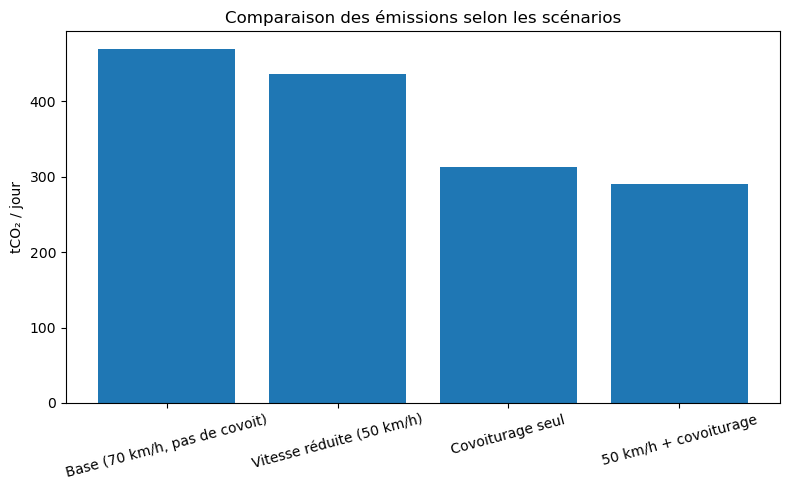

In [6]:
plt.figure(figsize=(8,5))
plt.bar(scenarios.keys(), scenarios.values())
plt.ylabel("tCO₂ / jour")
plt.title("Comparaison des émissions selon les scénarios")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()